In [1]:
## usual preamble
from cubical import param_db
import numpy as np
from pylab import *
%matplotlib inline

]0;IPython: CubiCal/examples

In [7]:
# this is how you load a database
db = param_db.load('/home/oms/projects/cc-testing/D147-LO-NOIFS-NOPOL-4M5S.MS/G-field:0.parmdb')
print db.names()
# and this is how you save a database (but the only thing you can change are values and flags...)
db.save('tmp_db')
db = param_db.load('/home/oms/projects/cc-testing/D147-LO-NOIFS-NOPOL-4M5S.MS/G-field:0.parmdb')

 - 11:13:57 - param_db           | reading /home/oms/projects/cc-testing/D147-LO-NOIFS-NOPOL-4M5S.MS/G-field:0.parmdb in fragmented mode
 - 11:13:58 - param_db           |   loading G:gain, shape 1x3254x64x28x2x2
 - 11:13:59 - param_db           |   loading G:gain.err, shape 1x3254x64x28x2x2


['G:gain', 'G:gain.err']


 - 11:14:23 - param_db           | wrote tmp_db in consolidated mode
 - 11:14:23 - param_db           | reading /home/oms/projects/cc-testing/D147-LO-NOIFS-NOPOL-4M5S.MS/G-field:0.parmdb in fragmented mode
 - 11:14:24 - param_db           |   loading G:gain, shape 1x3254x64x28x2x2
 - 11:14:25 - param_db           |   loading G:gain.err, shape 1x3254x64x28x2x2


In [8]:
G = db['G:gain']                              # G is a Parameter object
Gerr = db['G:gain.err']                              # G is a Parameter object
print G.shape, G.axis_labels                  # axis info
print "can be interpolated over axes",G.interpolation_axes         
print "antennas are", G.grid[G.ax.ant]
time, freq = G.grid[G.ax.time], G.grid[G.ax.freq]  # grid info
print "grid span is ",time[[0,-1]],freq[[0,-1]]
# this is how to check for valid slices
print "valid antennas",[ant for ant in range(len(G.grid[G.ax.ant])) if G.is_slice_valid(ant=ant,corr1=0,corr2=0)]

[1, 3254, 64, 28, 2, 2] ('dir', 'time', 'freq', 'ant', 'corr1', 'corr2')
can be interpolated over axes [1, 2]
antennas are ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28']
grid span is  [4.86596523e+09 4.86598549e+09] [1.2665e+09 1.5185e+09]
valid antennas [0, 1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27]


grid span is  [4.86596523e+09 4.86598549e+09] [1.2985e+09 1.5185e+09]
(3244, 56)


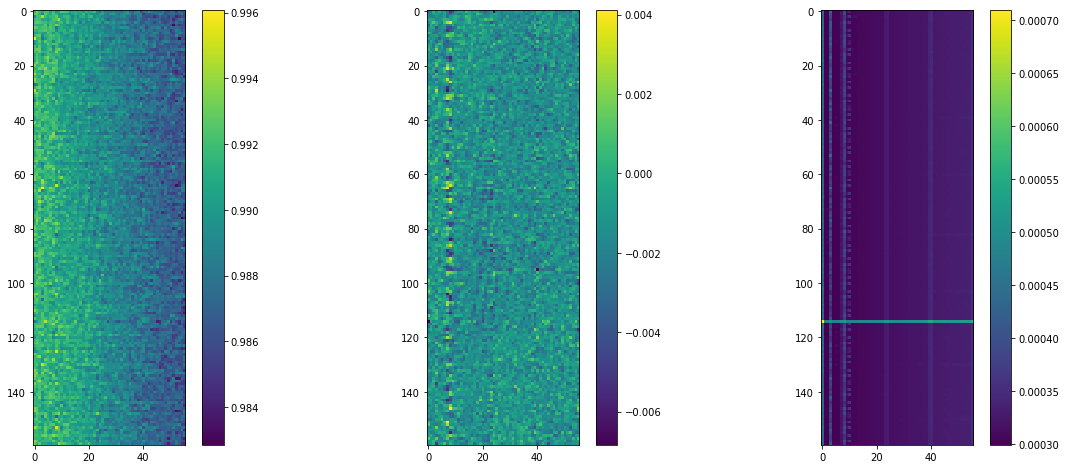

In [9]:
# this gets the "raw" solutions for a given slice (antenna, correlation, etc.), and also the grid they're defined on,
# which could be a subset of the full grid given by the description
ant,corr1,corr2 = 10,1,1
g0, (time, freq) = G.get_slice(ant=ant,corr1=corr1,corr2=corr2)
g0err, (time, freq) = Gerr.get_slice(ant=ant,corr1=corr1,corr2=corr2)
print "grid span is ",time[[0,-1]],freq[[0,-1]]
S = slice(0,160)
print g0.shape
figure(figsize=(20,8))
subplot(131)
imshow(abs(g0[S]))
colorbar()
subplot(132)
imshow(np.ma.angle(g0[S]))
colorbar()
subplot(133)
imshow(g0err[S])
colorbar()
# you can see this is a masked array, so flagged-out solutions are not plotted

In [ ]:
g = G.reinterpolate(ant=0,corr1=0,corr2=0)
print g.shape
# note that this has now been reinterpolated to a common time/freq grid, so the flagged values 
# are filled in by interpolations. Points *outside* the interpolatable domain are still masked
imshow(abs(g[0,0:50]))
colorbar()

In [ ]:
# we can also reinterpolate at the exact points of the raw slice
g = G.reinterpolate(ant=0,corr1=0,corr2=0,time=time[::10],freq=freq)
print g.shape
imshow(abs(g[0,:80,]))
colorbar()
# you can see this is a masked array, so flagged-out solutions are not plotted

In [ ]:
fobj=file("tmp","w")
import cPickle
cPickle.dump(G,fobj)